In [2298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2299]:
leads=pd.read_csv("Leads.csv")

In [2300]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2301]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [2302]:
leads.shape

(9240, 37)

In [2303]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2304]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2305]:
leads['TotalVisits'].unique()

array([  0.,   5.,   2.,   1.,   4.,   8.,  11.,   6.,   3.,   7.,  13.,
        17.,  nan,   9.,  12.,  10.,  16.,  14.,  21.,  15.,  22.,  19.,
        18.,  20.,  43.,  30.,  23.,  55., 141.,  25.,  27.,  29.,  24.,
        28.,  26.,  74.,  41.,  54., 115., 251.,  32.,  42.])

In [2306]:
percent_missing = leads.isnull().sum() * 100 / len(leads)
#missing_value_df = pd.DataFrame({'column_name': leads.columns,'percent_missing': percent_missing})

In [2307]:
percent_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2308]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2309]:
leads['Lead Origin'].unique()

array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

In [2310]:
for m in leads.columns:
    if leads[m].isnull().sum()*100/len(leads)>30:
        leads.drop(m,1,inplace=True)
    

In [2311]:
leads.isnull().sum() * 100 / len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2312]:
leads.shape

(9240, 31)

In [2313]:
leads = leads.replace('Select', np.nan)


In [2314]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,NaN,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,NaN,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,NaN,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,NaN,Mumbai,No,No,Modified


In [2315]:
leads.isnull().sum() * 100 / len(leads)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2316]:
for m in leads.columns:
    if leads[m].isnull().sum()*100/len(leads)>37:
        leads.drop(m,1,inplace=True)

In [2317]:
leads.isnull().sum() * 100 / len(leads)


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

In [2318]:
leads.shape

(9240, 28)

In [2319]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [2320]:
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [2321]:
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')
#leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')

In [2322]:
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
Pay per Click Ads       1
WeLearn                 1
Name: Lead Source, dtype: int64

In [2323]:
# Handling null values in Lead Source
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Live Chat             0.021730
Press_Release         0.021730
Social Media          0.021730
testone               0.010865
youtubechannel        0.010865
blog                  0.010865
welearnblog_Home      0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

In [2324]:
leads['Lead Source'].isnull().sum()

36

In [2325]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'Google')

In [2326]:
leads['Lead Source'].isnull().sum()

0

In [2327]:
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.482684
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
testone               0.010823
youtubechannel        0.010823
blog                  0.010823
welearnblog_Home      0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
WeLearn               0.010823
Name: Lead Source, dtype: float64

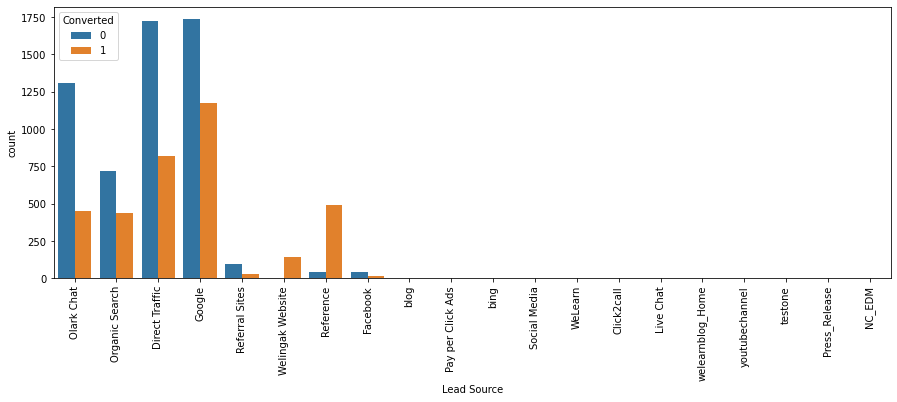

In [2328]:
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2329]:
leads['TotalVisits'].isnull().sum()

137

In [2330]:
leads['TotalVisits'].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
25.0      0.054927
24.0      0.054927
27.0      0.054927
22.0      0.032956
28.0      0.021971
29.0      0.021971
26.0      0.021971
115.0     0.010985
41.0      0.010985
55.0      0.010985
251.0     0.010985
141.0     0.010985
32.0      0.010985
42.0      0.010985
74.0      0.010985
43.0      0.010985
30.0      0.010985
54.0      0.010985
Name: TotalVisits, dtype: float64

In [2331]:
# Filling null values using median and converting total visits to integer because it can't be null
leads['TotalVisits']=leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['TotalVisits']=leads.TotalVisits.astype('int')


In [2332]:
leads['TotalVisits'].isnull().sum()

0

In [2333]:
leads['Page Views Per Visit'].isnull().sum()

137

In [2334]:
leads['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [2335]:
# Filling null values using median
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())

In [2336]:
leads['Page Views Per Visit'].isnull().sum()

0

In [2337]:
# prospect id and Lead number serve the same purpose so drop prospect ID
leads.drop('Prospect ID', axis=1, inplace=True)
leads.drop('Lead Number', axis=1, inplace=True)

In [2338]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0,0,0.0,Page Visited on Website,NaN,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5,674,2.5,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [2339]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [2340]:
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [2341]:
leads = leads[~pd.isnull(leads['Last Activity'])]

In [2342]:
leads['Last Activity'].isnull().sum()

0

In [2343]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                          2358
Specialization                                   3326
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

## conclusion:
##### COUNTRY AND CITY HAVE NULL VALUES.
        
    Here both country and city are not required for further analysis. So dropping both columns

In [2344]:
# Dropping country and city columns

leads.drop(['Country'], axis = 1, inplace = True)


In [2345]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                   3326
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [2346]:
leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.623645
Human Resource Management            14.438135
Marketing Management                 14.197212
Operations Management                 8.604371
Business Administration               6.917914
IT Projects Management                6.298400
Supply Chain Management               5.954225
Banking, Investment And Insurance     5.764929
Media and Advertising                 3.476166
Travel and Tourism                    3.476166
International Business                3.063156
Healthcare Management                 2.701773
E-COMMERCE                            1.927379
Hospitality Management                1.910170
Retail Management                     1.720874
Rural and Agribusiness                1.256238
E-Business                            0.980898
Services Excellence                   0.688350
Name: Specialization, dtype: float64

In [2347]:
leads = leads.dropna(subset=['Specialization'], how='all')

In [2348]:
leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.623645
Human Resource Management            14.438135
Marketing Management                 14.197212
Operations Management                 8.604371
Business Administration               6.917914
IT Projects Management                6.298400
Supply Chain Management               5.954225
Banking, Investment And Insurance     5.764929
Media and Advertising                 3.476166
Travel and Tourism                    3.476166
International Business                3.063156
Healthcare Management                 2.701773
E-COMMERCE                            1.927379
Hospitality Management                1.910170
Retail Management                     1.720874
Rural and Agribusiness                1.256238
E-Business                            0.980898
Services Excellence                   0.688350
Name: Specialization, dtype: float64

In [2349]:
leads['Specialization'].isnull().sum()

0

In [2350]:
leads.loc[(leads.Specialization == 'Finance Management') | (leads.Specialization == 'Human Resource Management') | 
       (leads.Specialization == 'Marketing Management') |  (leads.Specialization == 'Operations Management') |
       (leads.Specialization == 'IT Projects Management') | (leads.Specialization == 'Supply Chain Management') |
       (leads.Specialization == 'Healthcare Management') | (leads.Specialization == 'Hospitality Management') |
       (leads.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

In [2351]:
# categorize all busines courses
leads.loc[(leads.Specialization == 'Business Administration') | (leads.Specialization == 'International Business') | 
       (leads.Specialization == 'Rural and Agribusiness') | (leads.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'


In [2352]:
# categorize all industry courses
leads.loc[(leads.Specialization == 'Banking, Investment And Insurance') | (leads.Specialization == 'Media and Advertising') |
       (leads.Specialization == 'Travel and Tourism') | (leads.Specialization == 'Services Excellence') |
       (leads.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [2353]:
leads['Specialization'].value_counts(normalize=True)*100

Management Specializations    72.448804
Industry Specializations      15.332989
Business Specializations      12.218207
Name: Specialization, dtype: float64

In [2354]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Specialization                                      0
What is your current occupation                  1257
What matters most to you in choosing a course    1258
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [2355]:
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              82.301274
Working Professional    14.382960
Student                  2.678964
Other                    0.307422
Housewife                0.197628
Businessman              0.131752
Name: What is your current occupation, dtype: float64

In [2356]:
leads = leads.dropna(subset=['What is your current occupation'], how='all')

In [2357]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    1
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [2358]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.956073
Other                         0.021964
Flexibility & Convenience     0.021964
Name: What matters most to you in choosing a course, dtype: float64

In [2359]:
leads['What matters most to you in choosing a course'].isnull().sum()

1

In [2360]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [2361]:
leads['What matters most to you in choosing a course'].isnull().sum()

0

In [2362]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.956083
Other                         0.021959
Flexibility & Convenience     0.021959
Name: What matters most to you in choosing a course, dtype: float64

In [2363]:
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

In [2364]:
leads.drop(['What matters most to you in choosing a course', ],axis=1, inplace=True)

In [2365]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [2366]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 2 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4554 non-null   object 
 1   Lead Source                             4554 non-null   object 
 2   Do Not Email                            4554 non-null   object 
 3   Converted                               4554 non-null   int64  
 4   TotalVisits                             4554 non-null   int32  
 5   Total Time Spent on Website             4554 non-null   int64  
 6   Page Views Per Visit                    4554 non-null   float64
 7   Last Activity                           4554 non-null   object 
 8   Specialization                          4554 non-null   object 
 9   What is your current occupation         4554 non-null   object 
 10  A free copy of Mastering The Interview  4554 non-null   obje

In [2367]:
leads['Last Notable Activity'].unique()

array(['Email Opened', 'Modified', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'SMS Sent',
       'Approached upfront', 'Olark Chat Conversation',
       'View in browser link Clicked', 'Email Received',
       'Email Marked Spam'], dtype=object)

In [2368]:
leads.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,No,1,2,1532,2.0,Email Opened,Business Specializations,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1,305,1.0,Unreachable,Industry Specializations,Unemployed,No,Modified


# EDA

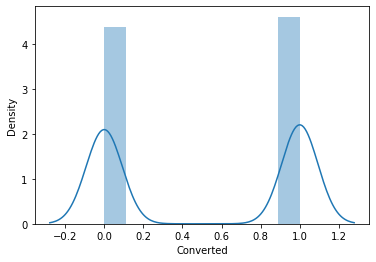

In [2369]:
sns.distplot(leads['Converted'])
plt.show()

Text(0.5, 1.0, 'What is your current occupation')

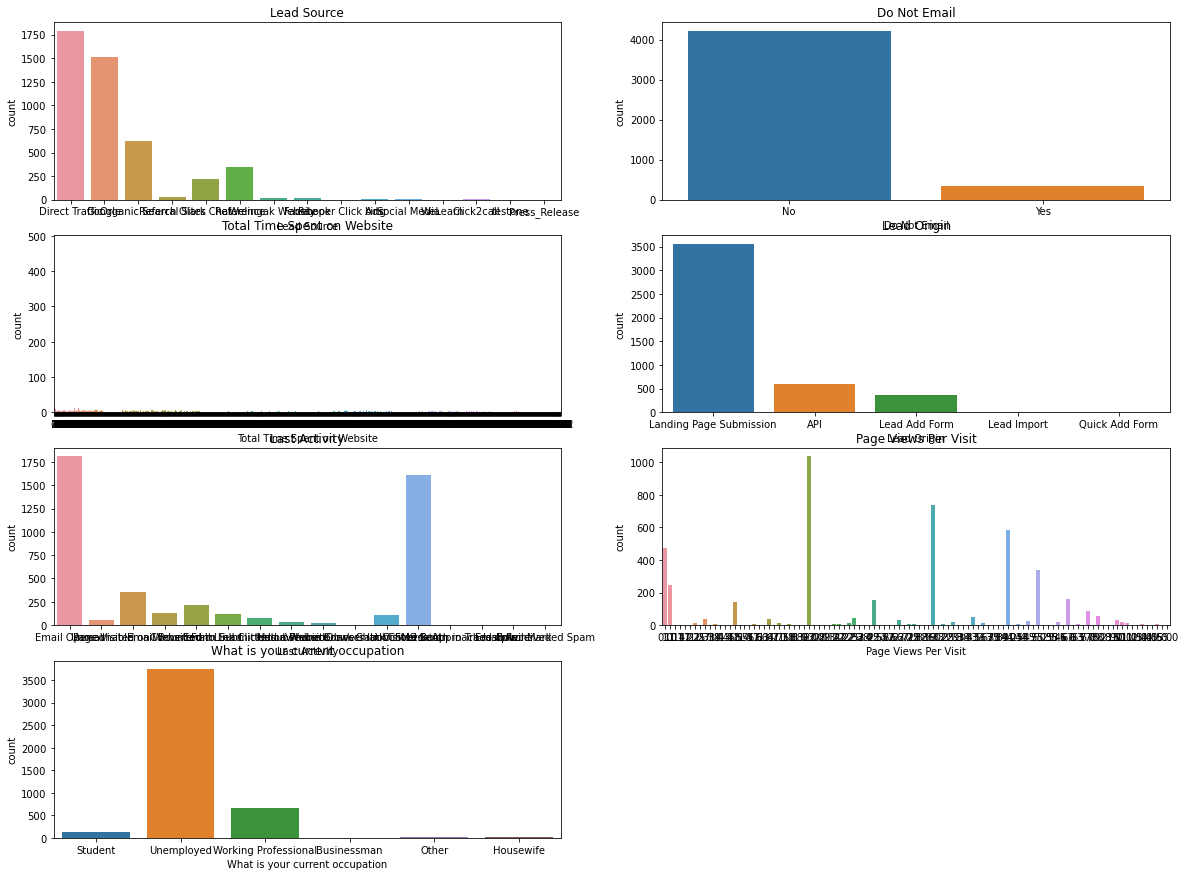

In [2370]:
plt.figure(figsize = (20,15))

plt.subplot(4,2,1)
sns.countplot(leads['Lead Source'])
plt.title('Lead Source')

plt.subplot(4,2,2)
sns.countplot(leads['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(4,2,3)
sns.countplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website')

plt.subplot(4,2,4)
sns.countplot(leads['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(4,2,5)
sns.countplot(leads['Last Activity'])
plt.title('Last Activity')

plt.subplot(4,2,6)
sns.countplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit')

plt.subplot(4,2,7)
sns.countplot(leads['What is your current occupation'])
plt.title('What is your current occupation')



Text(0.5, 1.0, '\n Last Notable Activity')

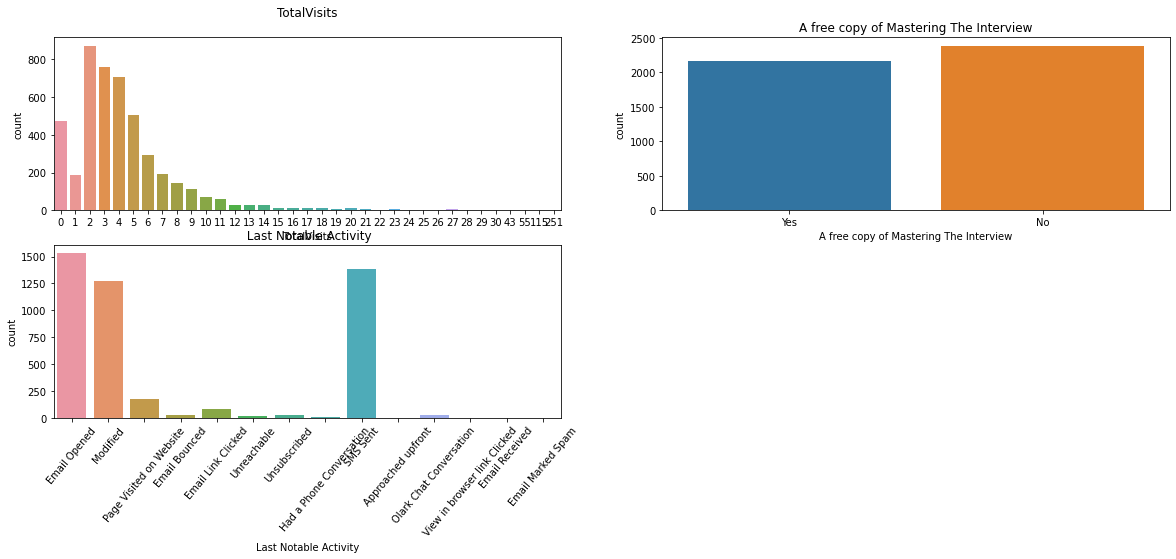

In [2371]:
plt.figure(figsize=(20,7))

plt.subplot(2,2,1)
sns.countplot(leads['TotalVisits'])
plt.title('TotalVisits\n')

plt.subplot(2,2,2)
sns.countplot(leads['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(2,2,3)
sns.countplot(leads['Last Notable Activity']).tick_params(axis='x',rotation = 50)
plt.title('\n Last Notable Activity')

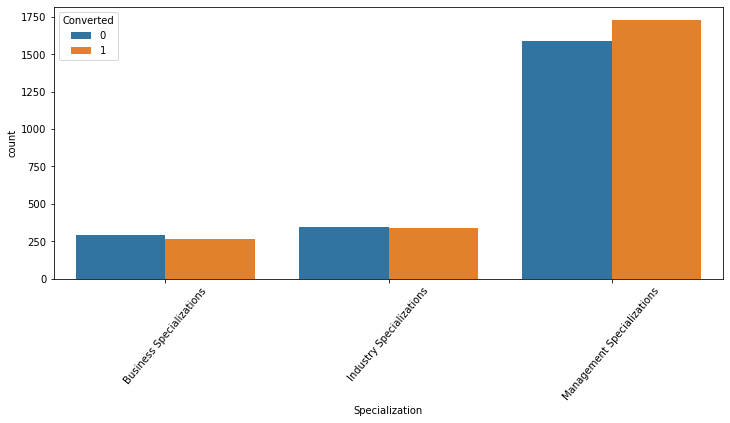

In [2372]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(12,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=50)
plt.show()

# Conclusion:
#### Management Specialization have highest number of leads.

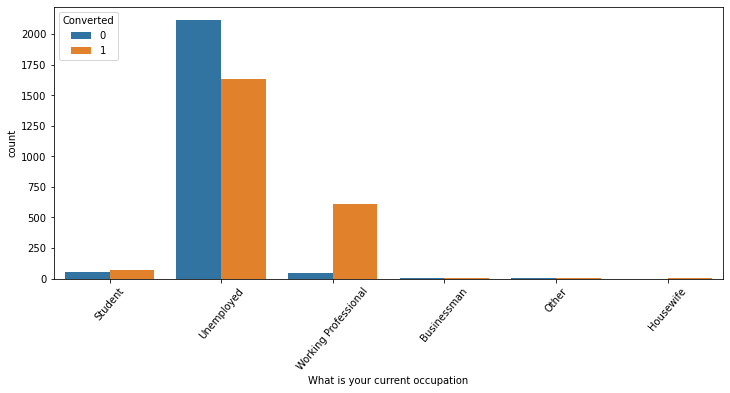

In [2373]:
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=50)
plt.show()

## Conclusion:
#### Unemployed and working professional have high chance of conversion

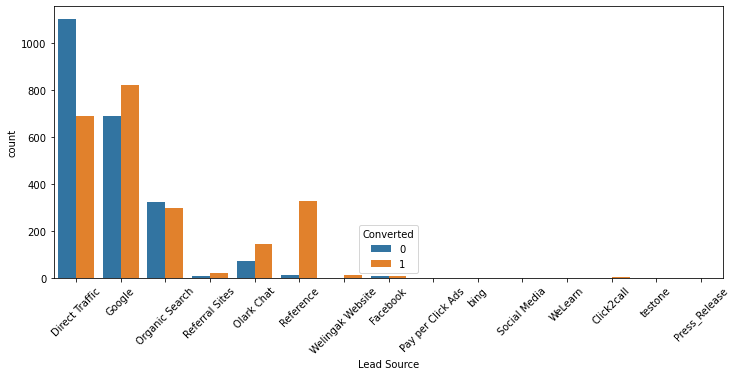

In [2374]:
plt.figure(figsize=(12,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Conclusions:

Most of the leads are from Google and Direct Traffic
conversion rate is high from Olark chat


<AxesSubplot:xlabel='Lead Origin', ylabel='count'>

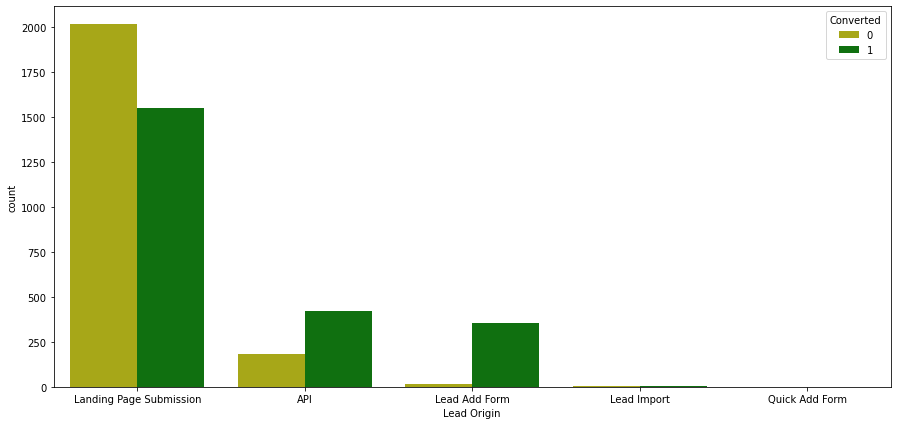

In [2375]:
plt.figure(figsize=(15,7))
sns.countplot(leads['Lead Origin'], hue = leads.Converted, palette = ["y","g"])

### Conclusions:
    Conversion rates are high from Landing page submission followed by API and Lead Add form

#### Numerical data analysis

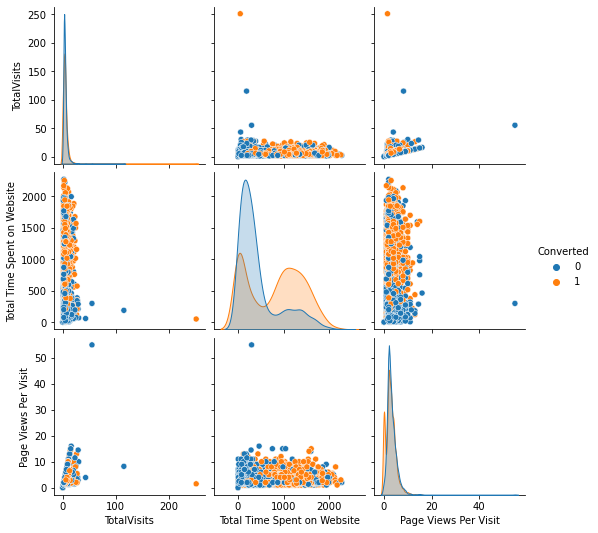

In [2376]:

lead_graph = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead_graph,diag_kind='kde',hue='Converted')
plt.show()

In [2377]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,4554.000000,4554.000000,4554.000000,4554.000000
mean,0.512297,4.284146,626.504392,2.930839
std,0.499904,5.443323,568.896751,2.142250
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,127.000000,2.000000
50%,1.000000,3.000000,391.000000,2.500000
75%,1.000000,5.000000,1119.750000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


In [2378]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 2 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             4554 non-null   object 
 1   Lead Source                             4554 non-null   object 
 2   Do Not Email                            4554 non-null   object 
 3   Converted                               4554 non-null   int64  
 4   TotalVisits                             4554 non-null   int32  
 5   Total Time Spent on Website             4554 non-null   int64  
 6   Page Views Per Visit                    4554 non-null   float64
 7   Last Activity                           4554 non-null   object 
 8   Specialization                          4554 non-null   object 
 9   What is your current occupation         4554 non-null   object 
 10  A free copy of Mastering The Interview  4554 non-null   obje

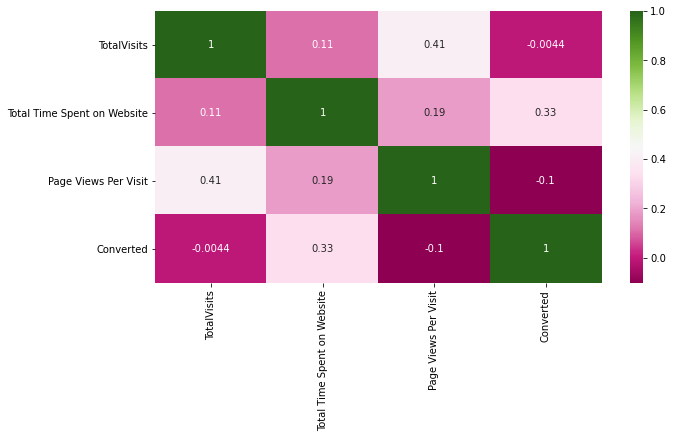

In [2379]:
plt.figure(figsize=(10,5))
sns.heatmap(lead_graph.corr(), annot=True,cmap='PiYG')
plt.show()


Conclusion:
    
    We can't find much correlation and few columns are not required for further analysis
 

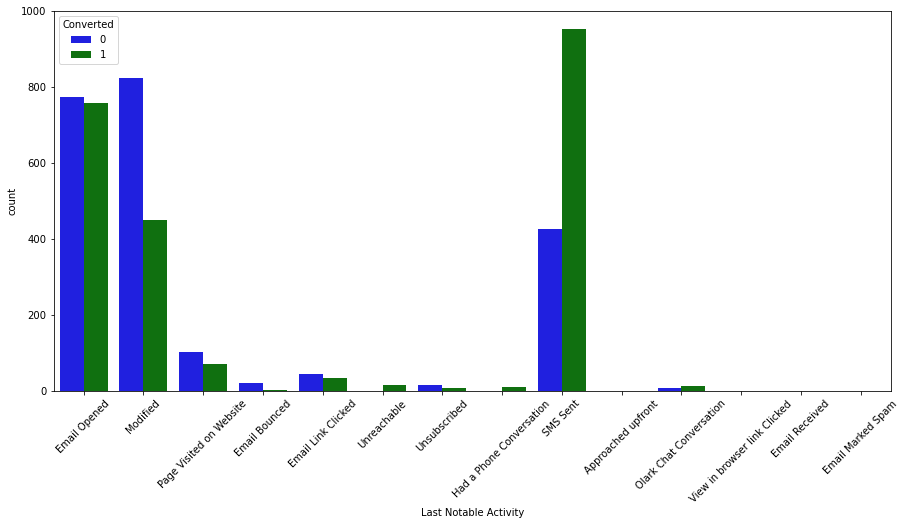

In [2380]:
plt.figure(figsize=(15,7))
s1=sns.countplot(leads['Last Notable Activity'], hue = leads.Converted, palette = ["b","g"])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

### Conclusions:
    Conversion rate is high those who opened Email and SMS.

# Dummy variable Creation for categorical 

In [2381]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)


In [2382]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
10,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
11,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [2383]:
# Add to the main dataframe ie leads
leads=pd.concat([leads,dummy], axis=1)

In [2384]:
leads.shape

(4554, 67)

In [2385]:
leads=leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity'],1)

In [2386]:
leads.shape

(4554, 59)

# Test-Train Split

In [2387]:

from sklearn.model_selection import train_test_split

In [2388]:
X = leads.drop(['Converted'], 1)
y=leads['Converted']

In [2389]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
2,2,1532,2.00,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,305,1.00,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2,1640,2.00,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10,8,1351,8.00,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11,8,1343,2.67,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [2390]:
y.head()


2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [2391]:
# Split data set into 70:30
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling

In [2392]:
from sklearn.preprocessing import StandardScaler

In [2393]:
# Import standard  scaler
scaler=StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5313,0.783326,1.645635,0.022722,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6336,0.116759,0.912213,0.927563,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2703,0.616684,-0.982021,0.475142,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
7794,1.616534,0.894625,-0.280400,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8393,-0.049883,2.813482,-0.429699,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [2394]:
X_train.nunique

<bound method DataFrame.nunique of       TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
5313     0.783326                     1.645635              0.022722   
6336     0.116759                     0.912213              0.927563   
2703     0.616684                    -0.982021              0.475142   
7794     1.616534                     0.894625             -0.280400   
8393    -0.049883                     2.813482             -0.429699   
...           ...                          ...                   ...   
8484    -0.383166                    -0.533526             -0.429699   
4227    -0.049883                    -1.010162              0.475142   
939     -0.383166                     1.190104             -0.429699   
164      0.283401                     0.514722              1.379983   
8076    -0.716449                    -1.101620             -1.334539   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
5313                        

# LOOKING AT CORRELATIONS


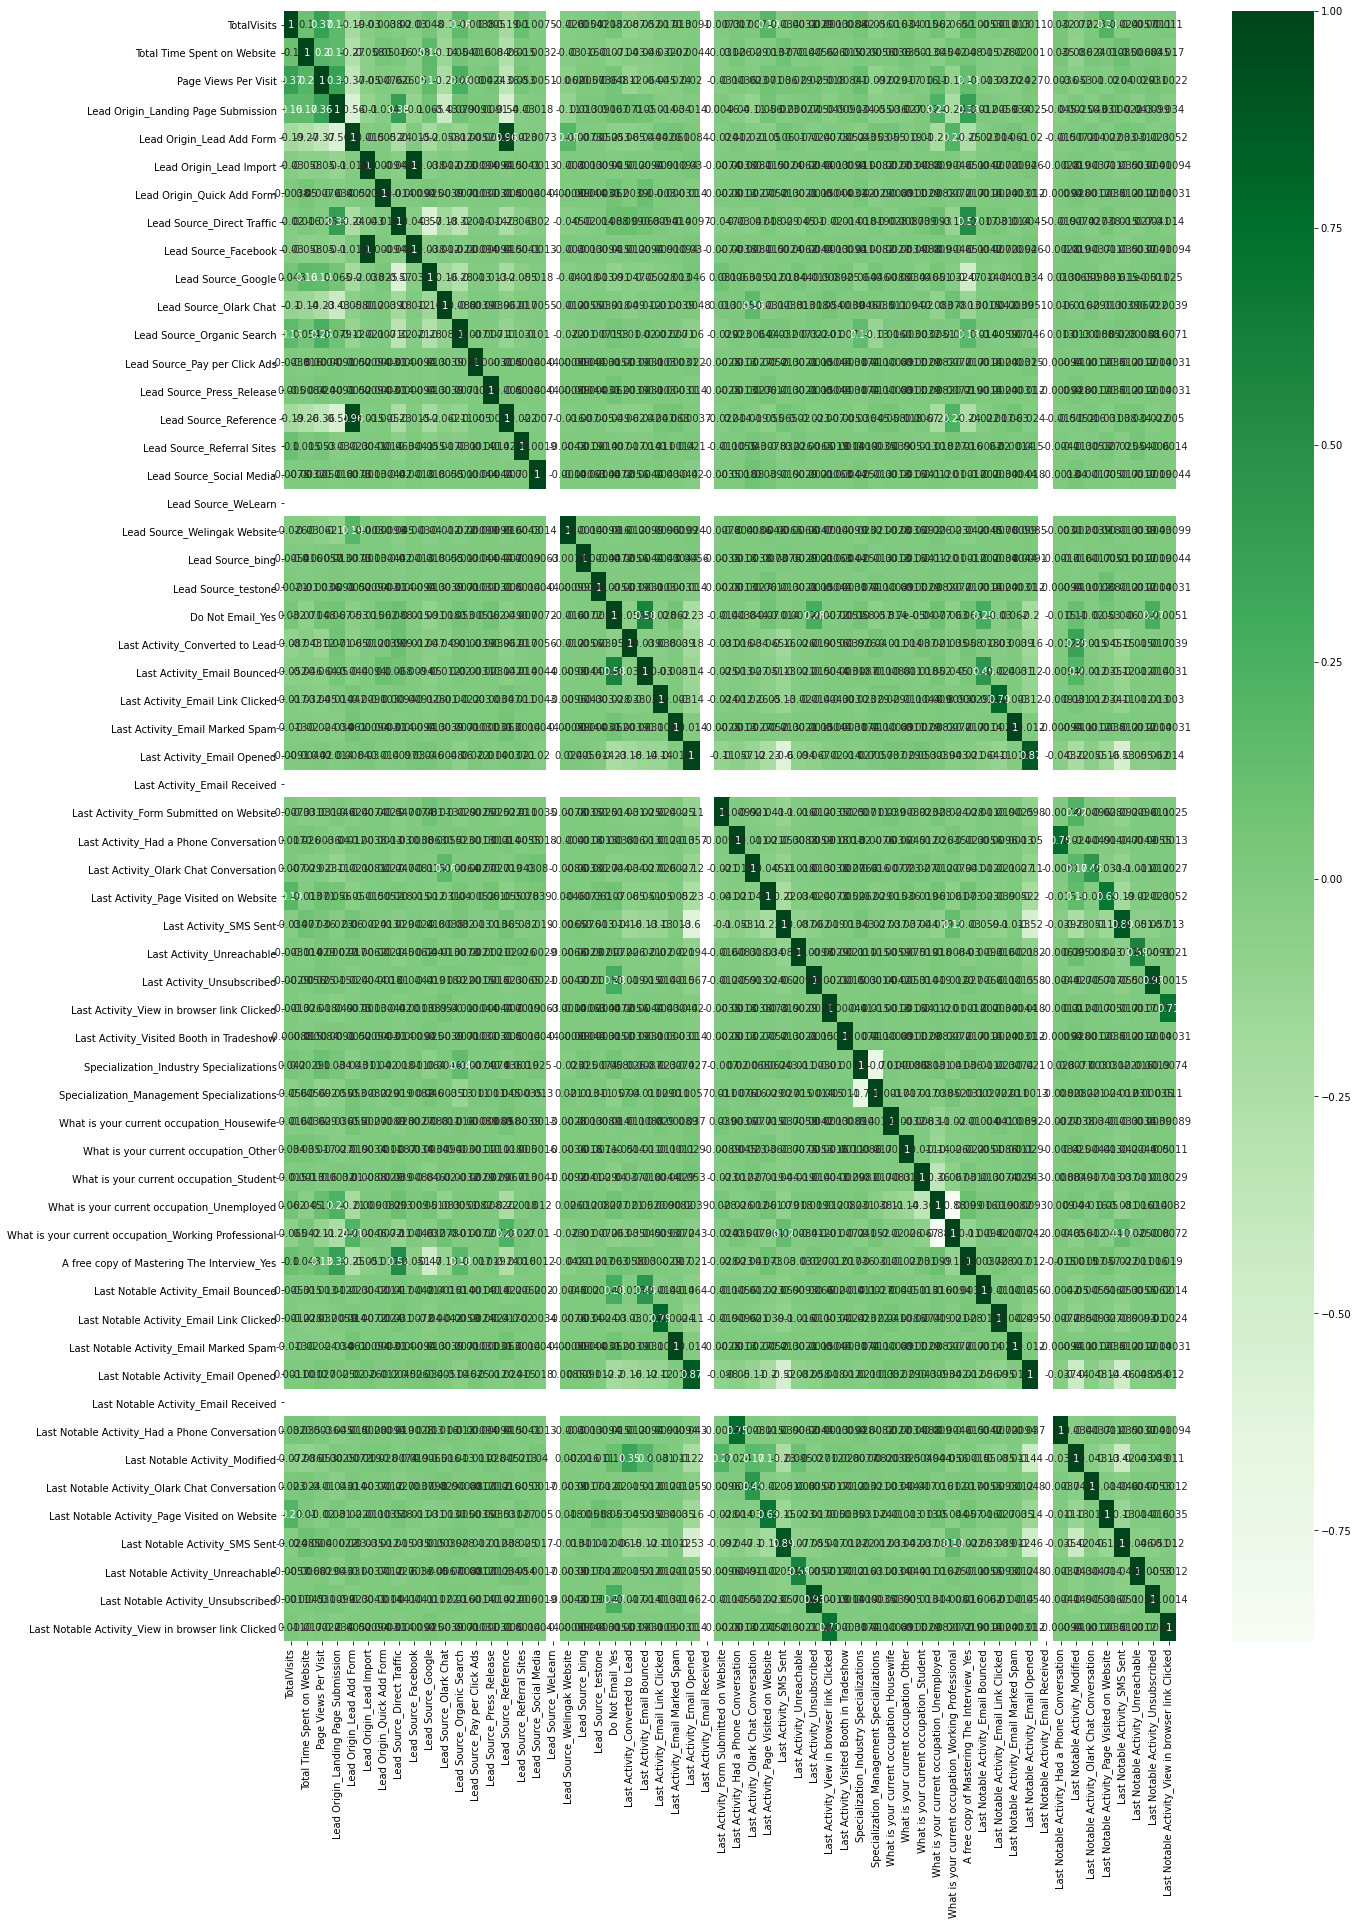

In [2395]:
plt.figure(figsize = (20,30))       
sns.heatmap(X_train.corr(),annot = True, cmap="Greens")
plt.show()

## Conclusions:
   There are so many variable. Its difficult to find correlation. We will analyse it in further steps

In [2396]:
X_train.head(2)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5313,0.783326,1.645635,0.022722,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6336,0.116759,0.912213,0.927563,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Model Building

In [2397]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [2398]:
# Import RFE
from sklearn.feature_selection import RFE

In [2399]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [2400]:
# 15 selected variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 37),
 ('Lead Origin_Quick Add Form', False, 18),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 32),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', False, 14),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Pay per Click Ads', False, 23),
 ('Lead Source_Press_Release', False, 40),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_testone', False, 17),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 5),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Lin

In [2401]:
# Assign column to col
col=X_train.columns[rfe.support_]

In [2402]:
X_train=X_train[col]

## Assessing model with statsmodel


In [2403]:
# import statsmodel
import statsmodels.api as sm

In [2404]:
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3171
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.0
Date:                Mon, 13 Jun 2022   Deviance:                       2886.1
Time:                        23:25:56   Pearson chi2:                 3.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3841      0.278      4.980      0.000       0.839       1.929
Total Time Spent on Website                              1.0201      0.051     20.004      0.000       0.920       1.120
Lead Origin_Landing Page Submission                     -1.1273      0.146     -7.716      0.000      -1.414      -0.841
Lead Origin_Lead Add Form                                0.5944      0.969      0.613      0.540      -1.305       2.494
Lead Source_Direct Traffic                              -0.4293      0.099     -4.324      0.000      -0.624      -0.235
Lead Source_Reference                                    2.3479      1.017      2.309      0.021       0.355       4.341
Lead Source_Welingak Website                            22.8687   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Do Not Email_Yes                                        -1.5588      0.233     -6.686      0.000      -2.016      -1.102
Last Activity_SMS Sent                                   0.9999      0.100      9.998      0.000       0.804       1.196
Last Activity_Unsubscribed                               1.2567      0.580      2.165      0.030       0.119       2.394
What is your current occupation_Housewife               22.7077   2.37e+04      0.001      0.999   -4.63e+04    4.64e+04
What is your current occupation_Unemployed              -0.7173      0.254     -2.820      0.005      -1.216      -0.219
What is your current occupation_Working Professional     1.6626      0.315      5.274      0.000       1.045       2.280
Last Notable Activity_Had a Phone Conversation          23.1650   2.14e+04      0.001      0.999    -4.2e+04     4.2e+04
Last Notable Activity_Modified                          -0.7841      0.108     -7.234      0.000      -0.997      -0.572
Last Notable Activity_Unreachable                        2.8351      1.104      2.568      0.010       0.672       4.999
========================================================================================================================
"""

In [2405]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3171
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.0
Date:                Mon, 13 Jun 2022   Deviance:                       2886.1
Time:                        23:25:56   Pearson chi2:                 3.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3841      0.278      4.980      0.000       0.839       1.929
Total Time Spent on Website                              1.0201      0.051     20.004      0.000       0.920       1.120
Lead Origin_Landing Page Submission                     -1.1273      0.146     -7.716      0.000      -1.414      -0.841
Lead Origin_Lead Add Form                                0.5944      0.969      0.613      0.540      -1.305       2.494
Lead Source_Direct Traffic                              -0.4293      0.099     -4.324      0.000      -0.624      -0.235
Lead Source_Reference                                    2.3479      1.017      2.309      0.021       0.355       4.341
Lead Source_Welingak Website                            22.8687   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Do Not Email_Yes                                        -1.5588      0.233     -6.686      0.000      -2.016      -1.102
Last Activity_SMS Sent                                   0.9999      0.100      9.998      0.000       0.804       1.196
Last Activity_Unsubscribed                               1.2567      0.580      2.165      0.030       0.119       2.394
What is your current occupation_Housewife               22.7077   2.37e+04      0.001      0.999   -4.63e+04    4.64e+04
What is your current occupation_Unemployed              -0.7173      0.254     -2.820      0.005      -1.216      -0.219
What is your current occupation_Working Professional     1.6626      0.315      5.274      0.000       1.045       2.280
Last Notable Activity_Had a Phone Conversation          23.1650   2.14e+04      0.001      0.999    -4.2e+04     4.2e+04
Last Notable Activity_Modified                          -0.7841      0.108     -7.234      0.000      -0.997      -0.572
Last Notable Activity_Unreachable                        2.8351      1.104      2.568      0.010       0.672       4.999
========================================================================================================================
"""

# Conclusion

  P value is high (>0.5) in Lead Origin_Lead Add form, Lead Source_welingak website,what is your current occupation_housefie and phone conversation.

## VHF(variance inflation factor)

In [2406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2407]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,35.99
4,Lead Source_Reference,34.23
1,Lead Origin_Landing Page Submission,6.94
10,What is your current occupation_Unemployed,6.60
5,Lead Source_Welingak Website,2.43
3,Lead Source_Direct Traffic,1.96
11,What is your current occupation_Working Profes...,1.86
7,Last Activity_SMS Sent,1.69
13,Last Notable Activity_Modified,1.49
6,Do Not Email_Yes,1.21


In [2408]:
X_train.drop('Lead Origin_Lead Add Form', axis=1, inplace=True)

In [2409]:
# Building model 2
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3172
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1443.2
Date:                Mon, 13 Jun 2022   Deviance:                       2886.5
Time:                        23:25:57   Pearson chi2:                 3.39e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3987      0.277      5.055      0.000       0.856       1.941
Total Time Spent on Website                              1.0195      0.051     19.997      0.000       0.920       1.119
Lead Origin_Landing Page Submission                     -1.1378      0.145     -7.835      0.000      -1.422      -0.853
Lead Source_Direct Traffic                              -0.4296      0.099     -4.328      0.000      -0.624      -0.235
Lead Source_Reference                                    2.9312      0.359      8.168      0.000       2.228       3.635
Lead Source_Welingak Website                            23.4521   2.38e+04      0.001      0.999   -4.67e+04    4.67e+04
Do Not Email_Yes                                        -1.5602      0.233     -6.691      0.000      -2.017      -1.103
Last Activity_SMS Sent                                   0.9992      0.100      9.994      0.000       0.803       1.195
Last Activity_Unsubscribed                               1.2557      0.580      2.163      0.031       0.118       2.393
What is your current occupation_Housewife               22.7030   2.36e+04      0.001      0.999   -4.63e+04    4.64e+04
What is your current occupation_Unemployed              -0.7207      0.254     -2.838      0.005      -1.218      -0.223
What is your current occupation_Working Professional     1.6578      0.315      5.265      0.000       1.041       2.275
Last Notable Activity_Had a Phone Conversation          23.1600   2.14e+04      0.001      0.999   -4.19e+04     4.2e+04
Last Notable Activity_Modified                          -0.7853      0.108     -7.245      0.000      -0.998      -0.573
Last Notable Activity_Unreachable                        2.8335      1.104      2.567      0.010       0.670       4.997
========================================================================================================================
"""

In [2410]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,6.89
9,What is your current occupation_Unemployed,6.54
2,Lead Source_Direct Traffic,1.96
10,What is your current occupation_Working Profes...,1.85
6,Last Activity_SMS Sent,1.69
3,Lead Source_Reference,1.57
12,Last Notable Activity_Modified,1.49
5,Do Not Email_Yes,1.21
0,Total Time Spent on Website,1.12
7,Last Activity_Unsubscribed,1.10


conclusions: 
    first 2 VIFs are >5. So first eliminate p values which are greater than 0.05

In [2411]:
X_train.drop('Lead Source_Welingak Website', axis=1, inplace=True)

In [2412]:
# Building model 3
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3173
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1449.6
Date:                Mon, 13 Jun 2022   Deviance:                       2899.2
Time:                        23:25:57   Pearson chi2:                 3.40e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4573      0.277      5.267      0.000       0.915       2.000
Total Time Spent on Website                              1.0147      0.051     19.937      0.000       0.915       1.114
Lead Origin_Landing Page Submission                     -1.2066      0.144     -8.374      0.000      -1.489      -0.924
Lead Source_Direct Traffic                              -0.4310      0.099     -4.345      0.000      -0.625      -0.237
Lead Source_Reference                                    2.8568      0.358      7.977      0.000       2.155       3.559
Do Not Email_Yes                                        -1.5711      0.233     -6.730      0.000      -2.029      -1.114
Last Activity_SMS Sent                                   0.9993      0.100     10.016      0.000       0.804       1.195
Last Activity_Unsubscribed                               1.2522      0.581      2.157      0.031       0.114       2.390
What is your current occupation_Housewife               22.7088   2.36e+04      0.001      0.999   -4.63e+04    4.63e+04
What is your current occupation_Unemployed              -0.7071      0.254     -2.782      0.005      -1.205      -0.209
What is your current occupation_Working Professional     1.6543      0.315      5.250      0.000       1.037       2.272
Last Notable Activity_Had a Phone Conversation          23.1303   2.14e+04      0.001      0.999   -4.18e+04    4.19e+04
Last Notable Activity_Modified                          -0.7866      0.108     -7.281      0.000      -0.998      -0.575
Last Notable Activity_Unreachable                        2.8242      1.104      2.557      0.011       0.660       4.989
========================================================================================================================
"""

P value is high in What is your current occupation_Housewife. so drop it.

In [2413]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,6.79
8,What is your current occupation_Unemployed,6.42
2,Lead Source_Direct Traffic,1.96
9,What is your current occupation_Working Profes...,1.84
5,Last Activity_SMS Sent,1.69
3,Lead Source_Reference,1.56
11,Last Notable Activity_Modified,1.49
4,Do Not Email_Yes,1.21
0,Total Time Spent on Website,1.12
6,Last Activity_Unsubscribed,1.10


In [2414]:
X_train.drop('What is your current occupation_Housewife', axis=1, inplace=True)

In [2415]:
# Building model 4
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3174
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1452.4
Date:                Mon, 13 Jun 2022   Deviance:                       2904.9
Time:                        23:25:58   Pearson chi2:                 3.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5733      0.272      5.784      0.000       1.040       2.106
Total Time Spent on Website                              1.0139      0.051     19.941      0.000       0.914       1.114
Lead Origin_Landing Page Submission                     -1.1983      0.144     -8.324      0.000      -1.481      -0.916
Lead Source_Direct Traffic                              -0.4377      0.099     -4.418      0.000      -0.632      -0.244
Lead Source_Reference                                    2.8703      0.358      8.021      0.000       2.169       3.572
Do Not Email_Yes                                        -1.5724      0.233     -6.736      0.000      -2.030      -1.115
Last Activity_SMS Sent                                   0.9964      0.100      9.984      0.000       0.801       1.192
Last Activity_Unsubscribed                               1.2528      0.580      2.158      0.031       0.115       2.391
What is your current occupation_Unemployed              -0.8264      0.248     -3.329      0.001      -1.313      -0.340
What is your current occupation_Working Professional     1.5352      0.310      4.947      0.000       0.927       2.143
Last Notable Activity_Had a Phone Conversation          22.1294    1.3e+04      0.002      0.999   -2.54e+04    2.54e+04
Last Notable Activity_Modified                          -0.7871      0.108     -7.296      0.000      -0.999      -0.576
Last Notable Activity_Unreachable                        2.8232      1.105      2.556      0.011       0.658       4.988
========================================================================================================================
"""

In [2416]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,6.72
7,What is your current occupation_Unemployed,6.35
2,Lead Source_Direct Traffic,1.96
8,What is your current occupation_Working Profes...,1.83
5,Last Activity_SMS Sent,1.69
3,Lead Source_Reference,1.54
10,Last Notable Activity_Modified,1.49
4,Do Not Email_Yes,1.21
0,Total Time Spent on Website,1.12
6,Last Activity_Unsubscribed,1.10


In [2417]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [2418]:
# Building model 5
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3175
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1457.4
Date:                Mon, 13 Jun 2022   Deviance:                       2914.9
Time:                        23:25:58   Pearson chi2:                 3.41e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.5885      0.272      5.841      0.000       1.056       2.122
Total Time Spent on Website                              1.0131      0.051     19.959      0.000       0.914       1.113
Lead Origin_Landing Page Submission                     -1.2074      0.143     -8.417      0.000      -1.489      -0.926
Lead Source_Direct Traffic                              -0.4415      0.099     -4.467      0.000      -0.635      -0.248
Lead Source_Reference                                    2.8542      0.358      7.979      0.000       2.153       3.555
Do Not Email_Yes                                        -1.5765      0.233     -6.754      0.000      -2.034      -1.119
Last Activity_SMS Sent                                   0.9841      0.100      9.875      0.000       0.789       1.179
Last Activity_Unsubscribed                               1.2426      0.581      2.140      0.032       0.105       2.380
What is your current occupation_Unemployed              -0.8170      0.248     -3.290      0.001      -1.304      -0.330
What is your current occupation_Working Professional     1.5371      0.310      4.952      0.000       0.929       2.145
Last Notable Activity_Modified                          -0.7989      0.108     -7.413      0.000      -1.010      -0.588
Last Notable Activity_Unreachable                        2.8092      1.105      2.543      0.011       0.644       4.974
========================================================================================================================
"""

In [2419]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,6.70
7,What is your current occupation_Unemployed,6.30
2,Lead Source_Direct Traffic,1.96
8,What is your current occupation_Working Profes...,1.82
5,Last Activity_SMS Sent,1.69
3,Lead Source_Reference,1.54
9,Last Notable Activity_Modified,1.49
4,Do Not Email_Yes,1.21
0,Total Time Spent on Website,1.11
6,Last Activity_Unsubscribed,1.10


### Conclusions:
High VIf value. So drop it.

In [2420]:
X_train.drop('Lead Origin_Landing Page Submission', axis=1, inplace=True)

In [2421]:
# Building model 6
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 3187
Model:                            GLM   Df Residuals:                     3176
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1494.8
Date:                Mon, 13 Jun 2022   Deviance:                       2989.5
Time:                        23:25:58   Pearson chi2:                 3.47e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7350      0.246      2.990      0.003       0.253       1.217
Total Time Spent on Website                              0.9637      0.049     19.540      0.000       0.867       1.060
Lead Source_Direct Traffic                              -0.6996      0.093     -7.495      0.000      -0.883      -0.517
Lead Source_Reference                                    3.7116      0.343     10.816      0.000       3.039       4.384
Do Not Email_Yes                                        -1.5352      0.226     -6.799      0.000      -1.978      -1.093
Last Activity_SMS Sent                                   0.9362      0.098      9.552      0.000       0.744       1.128
Last Activity_Unsubscribed                               1.2217      0.570      2.141      0.032       0.104       2.340
What is your current occupation_Unemployed              -0.8884      0.243     -3.650      0.000      -1.365      -0.411
What is your current occupation_Working Professional     1.6133      0.306      5.265      0.000       1.013       2.214
Last Notable Activity_Modified                          -0.7762      0.106     -7.352      0.000      -0.983      -0.569
Last Notable Activity_Unreachable                        2.7793      1.098      2.531      0.011       0.627       4.931
========================================================================================================================
"""

In [2422]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,2.69
1,Lead Source_Direct Traffic,1.70
4,Last Activity_SMS Sent,1.68
8,Last Notable Activity_Modified,1.48
7,What is your current occupation_Working Profes...,1.41
2,Lead Source_Reference,1.29
3,Do Not Email_Yes,1.21
0,Total Time Spent on Website,1.11
5,Last Activity_Unsubscribed,1.10
9,Last Notable Activity_Unreachable,1.01


#### Conclusions: 
All p values are less than <0.05 and VIFs are good. So next step is prediction

# Prediction

In [2423]:
y_train_pred=res.predict(sm.add_constant(X_train))
y_train_pred[:10]

5313    0.658450
6336    0.320808
2703    0.249783
7794    0.317126
8393    0.970523
283     0.328121
7680    0.546680
2004    0.313186
7816    0.025338
7635    0.025548
dtype: float64

In [2424]:
# Reshaping into array
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.65844987, 0.32080824, 0.24978304, 0.31712624, 0.9705234 ,
       0.32812086, 0.54668001, 0.31318632, 0.0253378 , 0.02554794])

In [2425]:
# create new dataframe containing actual conversion and probability of predicted ones
y_train_pred_final=pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.658450
1,0,0.320808
2,1,0.249783
3,1,0.317126
4,0,0.970523


In [2426]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,1,0.658450,1
1,0,0.320808,0
2,1,0.249783,0
3,1,0.317126,0
4,0,0.970523,1


In [2427]:
# import metrics
from sklearn import metrics

In [2428]:
# Create confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted)
print(confusion)

[[1252  303]
 [ 402 1230]]


In [2429]:
# Lets check the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7787888296203326


# Metrics beyond simply accuracy

In [2430]:
TP=confusion[1,1] # True positive
TN=confusion[0,0]  # True negative
FP=confusion[0,1]  # False positives
FN=confusion[1,0]  # False negatives

In [2431]:
# Calcuate the sensitivity
TP/(TP+FN)

0.7536764705882353

In [2432]:
TN/(TP+FP)

0.8166992824527071

In [2433]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(FP+TN))

0.19485530546623794


In [2434]:
# positive predictive value 
print (TP / float(TP+FP))

0.8023483365949119


In [2435]:
# Negative predictive value
print(TN/float(TN+FN))

0.7569528415961306


# Finding the optimal cutoff

In [2436]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2437]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate=False)

In [2438]:
# Import matplotlib to plot the ROC curve
import matplotlib.pyplot as plt

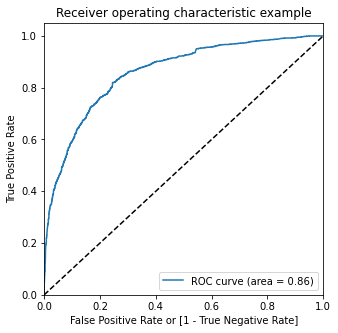

In [2439]:
# call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Conclusion:
    
    The area under the curve of ROC is 0.86. which is good model.

# Step 10: Finding Optimal Cutoff Point

In [2440]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.658450,1,1,1,1,1,1,1,1,0,0,0
1,0,0.320808,0,1,1,1,1,0,0,0,0,0,0
2,1,0.249783,0,1,1,1,0,0,0,0,0,0,0
3,1,0.317126,0,1,1,1,1,0,0,0,0,0,0
4,0,0.970523,1,1,1,1,1,1,1,1,1,1,1


In [2441]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.512080,1.000000,0.000000
0.1,0.1,0.572639,0.992034,0.132476
0.2,0.2,0.686225,0.957108,0.401929
0.3,0.3,0.753059,0.901348,0.597428
0.4,0.4,0.785064,0.839461,0.727974
0.5,0.5,0.778789,0.753676,0.805145
0.6,0.6,0.764041,0.674632,0.857878
0.7,0.7,0.737057,0.574142,0.908039
0.8,0.8,0.697835,0.460172,0.947267
0.9,0.9,0.639473,0.312500,0.982637


<Figure size 1080x1080 with 0 Axes>

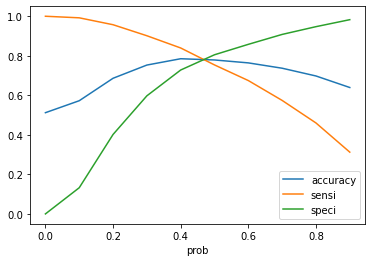

In [2442]:
 # Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(15,15))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2443]:
Conclusion:
       Optimal value of three metrics is 0.46. So cutoff is 0.46

SyntaxError: invalid syntax (<ipython-input-2443-00d8c77478cd>, line 1)

In [2444]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.658450,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.320808,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.249783,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.317126,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.970523,1,1,1,1,1,1,1,1,1,1,1,1


In [2445]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7762786319422654

In [2446]:
# Creating confusion matrix
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[1211,  344],
       [ 369, 1263]], dtype=int64)

In [2447]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2448]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7738970588235294

In [2449]:
# Let us calculate specificity
TN / float(TN+FP)

0.7787781350482315

In [2450]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2212218649517685


In [2451]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7859365276913504


In [2452]:
# Cutoff 0.46 seems to be good.

# Precision and Recall

In [2453]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1252,  303],
       [ 402, 1230]], dtype=int64)

### Precision
#### TP / TP + FP

In [2454]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8023483365949119

In [2455]:
from sklearn.metrics import precision_score, recall_score

In [2456]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7859365276913504

In [2457]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7738970588235294

Precision and recall tradeoff

In [2458]:
from sklearn.metrics import precision_recall_curve

In [2459]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 3182    0
 3183    1
 3184    1
 3185    1
 3186    0
 Name: Converted, Length: 3187, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       1
        ..
 3182    0
 3183    1
 3184    1
 3185    1
 3186    1
 Name: final_predicted, Length: 3187, dtype: int64)

In [2460]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

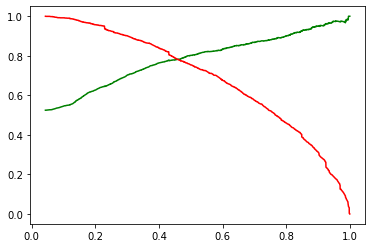

In [2461]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 11: Making predictions on the test set

In [2462]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity

In [2463]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [2464]:
scaler=StandardScaler()

X_test[['Total Time Spent on Website']]=scaler.fit_transform(X_test[['Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4383,0.283401,-0.171875,-1.091067,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6772,0.616684,0.521771,-1.094585,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
945,-0.216524,-0.372066,-1.096344,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7959,0.283401,0.235532,-1.096344,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
943,-0.049883,0.739523,-1.099281,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [2465]:
X_test=X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4383,-0.171875,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6772,0.521771,1,0,0,0,0,0,0,0,0,1,0,0,0,0
945,-0.372066,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7959,0.235532,1,0,0,0,0,0,0,0,0,0,1,0,0,0
943,0.739523,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [2466]:
X_test_sm=sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_SMS Sent,Last Activity_Unsubscribed,What is your current occupation_Housewife,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4383,1.0,-0.171875,1,0,0,0,0,0,0,0,0,1,0,0,1,0
6772,1.0,0.521771,1,0,0,0,0,0,0,0,0,1,0,0,0,0
945,1.0,-0.372066,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7959,1.0,0.235532,1,0,0,0,0,0,0,0,0,0,1,0,0,0
943,1.0,0.739523,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,1.506922,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4748,1.0,-0.421236,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4933,1.0,-1.100832,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2854,1.0,0.490161,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [2467]:
X_test.drop(['Lead Origin_Landing Page Submission','Lead Origin_Lead Add Form','Lead Source_Welingak Website',
            'What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'],1 , inplace=True)

In [2468]:
X_test.shape

(1367, 10)

In [2469]:
X_test.columns

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Reference', 'Do Not Email_Yes', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [2470]:
X_test_sm = sm.add_constant(X_test)

In [2471]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4383    0.250641
6772    0.586492
945     0.216170
7959    0.929256
943     0.955256
8647    0.481435
8949    0.280537
1840    0.780697
210     0.306118
2124    0.784945
dtype: float64

In [2472]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2473]:
# Let's see the head
y_pred_1.head()

,0
4383,0.250641
6772,0.586492
945,0.216170
7959,0.929256
943,0.955256


In [2474]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2475]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2476]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2477]:
y_pred_final.head()

,Converted,0
0,0,0.250641
1,1,0.586492
2,0,0.216170
3,1,0.929256
4,1,0.955256


In [2478]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final

,Converted,Conversion_Prob
0,0,0.250641
1,1,0.586492
2,0,0.216170
3,1,0.929256
4,1,0.955256
...,...,...
1362,0,0.785650
1363,1,0.593112
1364,0,0.625095
1365,1,0.977177


In [2479]:
y_pred_final['final_predicted']=y_pred_final.Conversion_Prob.map(lambda x: 1 if x>0.47 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.250641,0
1,1,0.586492,1
2,0,0.216170,0
3,1,0.929256,1
4,1,0.955256,1
...,...,...,...
1362,0,0.785650,1
1363,1,0.593112,1
1364,0,0.625095,1
1365,1,0.977177,1


In [2480]:
# Check Accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7820043891733723

In [2481]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[522, 144],
       [154, 547]], dtype=int64)

In [2482]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2483]:
# Calculate sensitivity
TP / float(TP+FN)

0.7803138373751783

In [2484]:
# Calculate specificity
TN / float(TN+FP)

0.7837837837837838

In [2485]:
# Precision
TP/(TP+FP)

0.7916063675832128

In [2486]:
# RECALL
TP/(TP+FN)

0.7803138373751783

# SUMMARY

### TRAIN DATA :

     →   Accuracy  : 77.62%
     → Sensitivity : 77.3%
     → Specificity : 77.87%
     → Precision   : 78.59%
     → Recall      : 77.38%

### Test Data:

     →   Accuracy  : 78.2%
     → Sensitivity : 78.03%
     → Specificity : 78.37%
     → Precision   : 79.16%
     → Recall      : 78.03%